In [1]:
import torch
import torch.nn as nn  
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 100)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [4]:
def rbf_kernel(x1, x2, variance=1.0, lengthscale=1.0):
    
    # Compute the squared Euclidean distance
    dist_sq = np.sum((x1 - x2)**2, axis = 0)
    
    # Compute the kernel value
    kernel_value = variance * np.exp(-0.5 * dist_sq / lengthscale**2)
    
    return kernel_value

GT_MAT = torch.zeros(501, 501)

for i, x1 in enumerate(np.linspace(-10, 10, 501)):
    for j, x2 in enumerate(np.linspace(-10, 10, 501)):
        GT_MAT[i, j] = rbf_kernel(np.array([x1]), np.array([x2]), 1.0, 1.0)
        
print("Done")

Done


In [5]:
net = Net().cuda()
optim = torch.optim.Adam(net.parameters(), lr=1e-3)

x1 = torch.linspace(-10, 10, 501).reshape(-1, 1).cuda()
x2 = torch.linspace(-10, 10, 501).reshape(-1, 1).cuda()

pbar = tqdm(range(100000))
for _ in pbar:
    output = net(x1) @ net(x2).T
    
    loss = F.mse_loss(output, GT_MAT.cuda())
    
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    pbar.set_description(f"Loss: {loss.item()}")
    
    if loss.item() < 1e-5:
        break


Loss: 0.00012637520558200777:  64%|██████▍   | 63841/100000 [02:28<01:23, 432.40it/s]

In [31]:
0.0033854874782264233

0.0033854874782264233

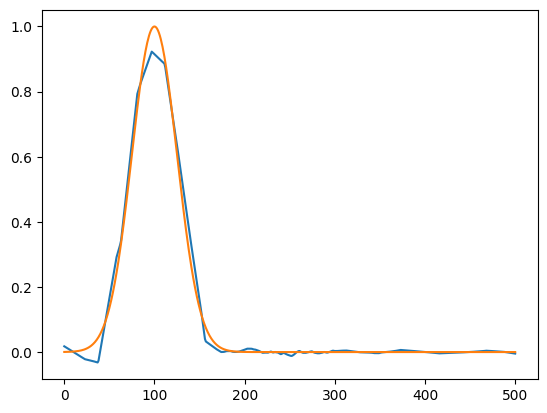

In [14]:
output.shape
idx = 100
plt.plot(output[idx,:].cpu().detach().numpy())
plt.plot(GT_MAT[idx,:].cpu().detach().numpy())